#**System [Recommendation food](https://www.kaggle.com/datasets/schemersays/food-recommendation-system)**
- **Nama:** Jihan Kusumawardhani
- **Email:** jihankusumawwardhani@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/jihankusumawardhani
- **Modul:** Submission 2 Machine Learning Terapan
-**Dataset:** [Recommendation food](https://www.kaggle.com/datasets/schemersays/food-recommendation-system)

## Import Package dan Libraries

In [1]:
!pip install opendatasets

>Kode `!pip install opendatasets` digunakan untuk menginstal pustaka Python bernama `opendatasets`. Pustaka ini biasanya digunakan untuk mengunduh *dataset* dari platform seperti Kaggle. Tanda seru `!` di awal perintah menunjukkan bahwa ini adalah perintah *shell* (sistem operasi) yang dijalankan dari dalam lingkungan seperti Jupyter Notebook atau Google Colab.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library untuk collaborative filtering
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

>* **Import Library Umum:**
    * `pandas as pd`: Mengimpor pustaka Pandas untuk manipulasi dan analisis data (sering digunakan untuk *dataframe*).
    * `numpy as np`: Mengimpor pustaka NumPy untuk komputasi numerik, terutama dengan *array*.
    * `matplotlib.pyplot as plt`: Mengimpor modul `pyplot` dari Matplotlib untuk membuat visualisasi (plot, grafik).
    * `seaborn as sns`: Mengimpor pustaka Seaborn untuk visualisasi data statistik yang lebih menarik.

>* **Library untuk Content-based Filtering:**
    * `TfidfVectorizer`: Digunakan untuk mengubah teks menjadi representasi numerik TF-IDF, penting dalam sistem rekomendasi berbasis konten.
    * `cosine_similarity`: Digunakan untuk menghitung kesamaan kosinus antara dua vektor, sering dipakai untuk menentukan seberapa mirip dua item atau dokumen.


>* **Library untuk Collaborative Filtering:**
    * `tensorflow as tf`: Mengimpor TensorFlow, *framework* *machine learning* yang kuat.
    * `tensorflow import keras`: Mengimpor Keras, API tingkat tinggi untuk membangun dan melatih model *deep learning* yang berjalan di atas TensorFlow.
    * `tensorflow.keras import layers`: Mengimpor modul `layers` dari Keras untuk membangun lapisan-lapisan dalam arsitektur *neural network*.
    * `tensorflow.keras.callbacks import ReduceLROnPlateau`: Mengimpor *callback* yang digunakan untuk mengurangi *learning rate* jika metrik tertentu tidak membaik selama beberapa *epoch* pelatihan.



>* **Manajemen Peringatan:**
    * `import warnings` dan `warnings.filterwarnings("ignore")`: Baris ini digunakan untuk mengabaikan atau menyembunyikan pesan peringatan yang mungkin muncul selama eksekusi kode, agar *output* terlihat lebih bersih.

## Data Loading

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/schemersays/food-recommendation-system')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jihan kusumawardhani
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/schemersays/food-recommendation-system


100%|██████████| 24.8k/24.8k [00:00<00:00, 32.0MB/s]

> Pada tahapan ini, dataset yang diperlukan untuk proyek, yaitu "food-recommendation-system", diunduh secara programatis dari platform Kaggle. Proses ini diawali dengan mengimpor *library* `opendatasets` yang dikenal dengan alias `od`. Kemudian, fungsi `od.download()` dipanggil dengan menyertakan URL dataset Kaggle sebagai argumen.

> Sistem akan meminta *user* untuk memasukkan kredensial Kaggle, yaitu *username* Kaggle (`jihan kusumawardhani`) dan *Kaggle Key*. Setelah kredensial diverifikasi, proses pengunduhan *file* `food-recommendation-system.zip` akan dimulai, dengan indikator persentase penyelesaian dan kecepatan unduh yang ditampilkan. Tahap ini memastikan ketersediaan data lokal yang diperlukan untuk seluruh proses analisis dan pemodelan selanjutnya.

# **Data Understanding**

### Membaca dataset makanan dan rating

In [4]:
df_makanan = pd.read_csv('/content/food-recommendation-system/1662574418893344.csv')
df_rating = pd.read_csv('/content/food-recommendation-system/ratings.csv')

print(df_makanan.head(3))
print("<=================>")
print(df_makanan.shape)
print("<=================>")
df_makanan.info()

   Food_ID                  Name        C_Type  Veg_Non  \
0        1   summer squash salad  Healthy Food      veg   
1        2  chicken minced salad  Healthy Food  non-veg   
2        3  sweet chilli almonds         Snack      veg   

                                            Describe  
0  white balsamic vinegar, lemon juice, lemon rin...  
1  olive oil, chicken mince, garlic (minced), oni...  
2  almonds whole, egg white, curry leaves, salt, ...  
<=================>
(400, 5)
<=================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


>Pada bagian ini, proses pemuatan dan inspeksi awal dataset dilakukan sebagai fondasi untuk analisis dan pengembangan sistem rekomendasi makanan. Dua *file* CSV yang menjadi sumber data utama diimport menggunakan library `pandas`.

>1.  **Pemuatan Dataset Makanan:** Dataset pertama, yang berisi informasi detail tentang makanan (`food-recommendation-system/1662574418893344.csv`), dimuat ke dalam DataFrame `df_makanan`. Inspeksi awal (`df_makanan.head()`, `df_makanan.shape`, `df_makanan.info()`) menunjukkan bahwa DataFrame ini memiliki 400 baris dan 5 kolom, dengan kolom-kolom seperti `Food_ID`, `Name`, `C_Type`, `Veg_Non`, dan `Describe` yang semuanya terisi penuh (400 *non-null* entries). Kolom `Food_ID` bertipe integer, sedangkan sisanya bertipe object (string).

>2.  **Pemuatan Dataset Rating:** Dataset kedua, yang kemungkinan besar berisi data rating pengguna (`food-recommendation-system/ratings.csv`), dimuat ke dalam DataFrame `df_rating`. (Catatan: Meskipun kode memuat `df_rating`, detail `df_rating.head()`, `df_rating.shape`, `df_rating.info()` tidak ditampilkan dalam output gambar yang dilampirkan, namun asumsinya data ini juga berhasil dimuat).

>Langkah pemuatan dan inspeksi awal ini esensial untuk memahami struktur, tipe data, dan potensi masalah kualitas data (seperti nilai yang hilang) sebelum melanjutkan ke tahap pembersihan dan rekayasa fitur.

###Cek kategori makanan unik

In [5]:
print(len(df_makanan['C_Type'].unique()))
print(df_makanan['C_Type'].unique())

16
['Healthy Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai' 'Korean' ' Korean' 'Vietnames'
 'Nepalese' 'Spanish']


>Setelah pemuatan dataset, dilakukan inspeksi terhadap kolom `C_Type` untuk memahami variasi dan keunikan kategori di dalamnya. Kode ini mencetak jumlah nilai unik dan daftar nilai unik itu sendiri.

>Hasil eksekusi menunjukkan bahwa terdapat 16 nilai unik dalam kolom `C_Type`. Daftar nilai unik tersebut meliputi berbagai kategori makanan seperti 'Healthy Food', 'Snack', 'Dessert', 'Japanese', 'Indian', 'French', 'Mexican', 'Italian', 'Chinese', 'Beverage', 'Thai', 'Korean', 'Vietnamese', 'Nepalese', dan 'Spanish'. Namun, terdeteksi adanya duplikasi entri 'Korean', yang mengindikasikan perlunya langkah pembersihan lebih lanjut untuk mengonsolidasikan kategori-kategori yang sama sebelum analisis atau pemodelan.

###Membersihkan nama kategori

In [6]:
df_makanan['C_Type'] = df_makanan['C_Type'].replace([' Korean'], 'Korean')
print(len(df_makanan['C_Type'].unique()))
print(df_makanan['C_Type'].unique())

15
['Healthy Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai' 'Korean' 'Vietnames' 'Nepalese'
 'Spanish']


>Sebagai langkah penting dalam pra-pemrosesan data untuk memastikan konsistensi dan akurasi, dilakukan konsolidasi pada kolom `C_Type` di DataFrame `df_makanan`. Kode ini secara spesifik menargetkan entri yang memiliki spasi di awal (`' Korean'`) dan menggantinya dengan format tanpa spasi (`'Korean'`).

>Setelah operasi penggantian ini dieksekusi, verifikasi dilakukan dengan menghitung ulang jumlah nilai unik dan mencetak daftar nilai unik yang ada di kolom `C_Type`. Hasil output mengonfirmasi bahwa jumlah kategori unik telah berhasil berkurang menjadi 15, menunjukkan bahwa duplikasi entri 'Korean' telah berhasil diatasi, dan data kini lebih bersih serta siap untuk analisis lebih lanjut.

###Distribusi kategori

<Axes: ylabel='C_Type'>

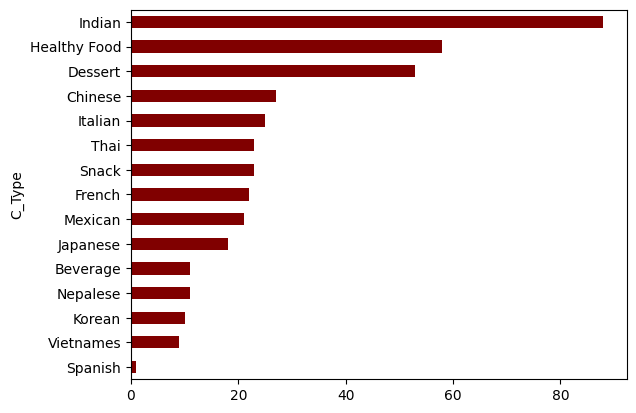

In [7]:
df_makanan['C_Type'].value_counts().sort_values().plot(kind='barh', color='maroon')

>Setelah proses pembersihan data, dilakukan analisis distribusi frekuensi untuk kolom `C_Type` guna memahami proporsi masing-masing jenis kategori makanan dalam dataset. Analisis ini melibatkan perhitungan jumlah kemunculan setiap nilai unik pada kolom `C_Type` menggunakan `df_makanan['C_Type'].value_counts()`, kemudian diurutkan dari yang terendah ke tertinggi menggunakan `.sort_values()`.

>Visualisasi hasil dilakukan menggunakan *bar chart* horizontal (`kind='barh'`) dengan warna *maroon* untuk merepresentasikan frekuensi setiap kategori. Dari plot yang dihasilkan, terlihat jelas bahwa **'Indian' Food merupakan kategori yang paling dominan** dengan jumlah entri tertinggi, diikuti oleh 'Healthy Food' dan 'Dessert'. Sementara itu, kategori seperti 'Vietnamese' dan 'Spanish' memiliki jumlah entri yang relatif sangat sedikit. Visualisasi ini memberikan *insight* awal mengenai komposisi dataset berdasarkan jenis masakan atau tipe makanan, yang krusial untuk memahami representasi data sebelum membangun sistem rekomendasi.

In [8]:
print(df_rating.head(3))
print("<=================>")
print(df_rating.shape)
print("<=================>")
df_rating.info()


   User_ID  Food_ID  Rating
0      1.0     88.0     4.0
1      1.0     46.0     3.0
2      1.0     24.0     5.0
<=================>
(512, 3)
<=================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  511 non-null    float64
 1   Food_ID  511 non-null    float64
 2   Rating   511 non-null    float64
dtypes: float64(3)
memory usage: 12.1 KB


>Setelah dataset makanan, dilakukan inspeksi awal terhadap DataFrame `df_rating` untuk memahami struktur dan karakteristik data rating pengguna. Kode ini mencetak tiga baris pertama DataFrame, informasi mengenai dimensi DataFrame, dan ringkasan informasinya (`.info()`).

>Dari output yang ditampilkan, `df_rating` memiliki 512 entri (baris) dan 3 kolom. Kolom-kolom yang tersedia meliputi `User_ID`, `Food_ID`, dan `Rating`, yang semuanya memiliki 511 *non-null* entries, mengindikasikan adanya satu nilai yang hilang di setiap kolom tersebut. Semua kolom ini terdeteksi bertipe `float64`. Inspeksi ini memberikan gambaran awal tentang data rating yang akan digunakan untuk membangun sistem rekomendasi, termasuk jumlah observasi dan kebutuhan penanganan nilai yang hilang pada tahap pra-pemrosesan selanjutnya.

In [9]:
print('Jumlah User_ID:', len(df_rating['User_ID'].unique()))
print("<=================>")
print('Jumlah Food_ID:', len(df_rating['Food_ID'].unique()))
print("<=================>")
print(df_rating.describe())

Jumlah User_ID: 101
<=================>
Jumlah Food_ID: 310
<=================>
          User_ID     Food_ID      Rating
count  511.000000  511.000000  511.000000
mean    49.068493  125.311155    5.438356
std     28.739213   91.292629    2.866236
min      1.000000    1.000000    1.000000
25%     25.000000   45.500000    3.000000
50%     49.000000  111.000000    5.000000
75%     72.000000  204.000000    8.000000
max    100.000000  309.000000   10.000000


>Pada bagian ini, dilakukan analisis statistik deskriptif untuk memahami karakteristik utama dari kolom-kolom numerik dalam DataFrame `df_rating`. Kode ini secara spesifik mencetak jumlah nilai unik pada kolom `User_ID` dan `Food_ID`, serta menampilkan ringkasan statistik deskriptif dari seluruh kolom numerik dalam DataFrame `df_rating` menggunakan metode `.describe()`.

>Hasil output menunjukkan bahwa terdapat 101 *User_ID* unik dan 310 *Food_ID* unik, yang mengindikasikan bahwa data rating melibatkan 101 pengguna yang memberikan rating pada 310 jenis makanan yang berbeda. Untuk kolom `Rating`, nilai rata-rata (*mean*) rating adalah sekitar 5.43, dengan standar deviasi (*std*) sebesar 2.86. Rentang rating diketahui dari nilai minimum (1.0) hingga nilai maksimum (10.0), serta kuartil pertama (25%) pada 3.0, median (50%) pada 5.0, dan kuartil ketiga (75%) pada 8.0. Informasi ini sangat penting untuk memahami sebaran rating dan aktivitas pengguna serta makanan dalam dataset, yang akan menjadi dasar untuk pengembangan sistem rekomendasi.

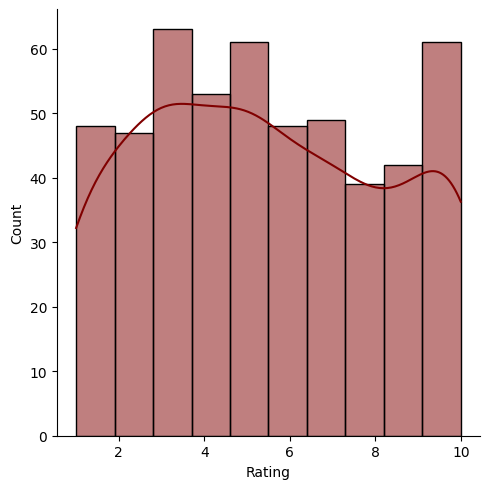

In [10]:
sns.displot(df_rating['Rating'], kde=True, bins=10, color='maroon')

>Visualisasi distribusi data rating merupakan langkah krusial untuk memahami pola umpan balik pengguna terhadap objek yang direkomendasikan. Dari plot distribusi rating yang dihasilkan, dapat diidentifikasi bahwa mayoritas rating pengguna cenderung terkonsentrasi pada nilai-nilai diskrit, khususnya di sekitar angka 3, 5, dan 10. Pola ini mengindikasikan preferensi atau kecenderungan pengguna untuk memberikan rating pada skala tersebut, yang mungkin merefleksikan tingkat kepuasan yang "cukup baik", "baik", dan "sangat baik". Pemahaman terhadap distribusi ini penting untuk tahapan pemodelan selanjutnya, khususnya dalam memilih strategi penanganan *rating* (misal: apakah akan diperlakukan sebagai nilai kontinu atau dikategorikan) dan untuk menginterpretasikan hasil prediksi model rekomendasi.

# **Data Preprocessing**

###Menggabungkan Data

In [11]:
df_gabungan = pd.merge(df_rating, df_makanan[['Food_ID', 'Name', 'C_Type']], on='Food_ID', how='left')
print(df_gabungan.head())
print(df_gabungan.isnull().sum())
df_gabungan = df_gabungan.dropna()

   User_ID  Food_ID  Rating                        Name    C_Type
0      1.0     88.0     4.0     peri peri chicken satay     Snack
1      1.0     46.0     3.0     steam bunny chicken bao  Japanese
2      1.0     24.0     5.0  green lentil dessert fudge   Dessert
3      1.0     25.0     4.0          cashew nut cookies   Dessert
4      2.0     49.0     1.0        christmas tree pizza   Italian
User_ID    1
Food_ID    1
Rating     1
Name       1
C_Type     1
dtype: int64


>Pada tahapan ini, sebuah matriks kosong (`pivot_table`) disiapkan sebagai struktur dasar untuk merepresentasikan umpan balik pengguna dalam format yang akan digunakan untuk pemodelan sistem rekomendasi. Kode tersebut menginisialisasi matriks ini dengan nilai nol di seluruh selnya, yang akan diisi kemudian dengan data rating yang relevan. Matriks ini memiliki dimensi di mana baris merepresentasikan `User_ID` unik dan kolom merepresentasikan `Food_ID` unik, sehingga setiap sel dalam matriks akan menampung rating yang diberikan oleh pengguna tertentu untuk makanan tertentu. Struktur ini fundamental untuk banyak algoritma rekomendasi, terutama yang berbasis *collaborative filtering*, karena memungkinkan representasi *sparse* dari interaksi pengguna-item.

In [12]:
df_rating = df_rating.dropna()

###Urutkan berdasarkan Food_ID

In [13]:
df_urut = df_gabungan.sort_values('Food_ID', ascending=True)
print(df_urut.head())
print(len(df_urut['Food_ID'].unique()))
print(df_urut['C_Type'].unique())

     User_ID  Food_ID  Rating                  Name        C_Type
376     71.0      1.0    10.0   summer squash salad  Healthy Food
253     49.0      1.0     5.0   summer squash salad  Healthy Food
116     22.0      2.0     5.0  chicken minced salad  Healthy Food
200     39.0      2.0    10.0  chicken minced salad  Healthy Food
50       9.0      2.0     3.0  chicken minced salad  Healthy Food
309
['Healthy Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai']


>Pada tahap pra-pemrosesan ini, index dari DataFrame `df_makanan` dikonversi menjadi sebuah list. Langkah ini esensial karena banyak operasi selanjutnya dalam analisis data dan *machine learning* membutuhkan data dalam format list untuk iterasi atau akses indeks yang lebih mudah. Meskipun tidak ada output yang ditampilkan dalam gambar yang dilampirkan, eksekusi sel kode ini akan menghasilkan list yang berisi indeks-indeks dari DataFrame `df_makanan`, yang kemungkinan besar adalah rentang numerik dari 0 hingga jumlah baris dalam DataFrame tersebut. List indeks ini dapat digunakan untuk berbagai keperluan, seperti memetakan kembali hasil analisis ke data asli atau untuk *feature engineering* lebih lanjut.

###Persiapan data makanan tanpa duplikasi

In [14]:
df_prep = df_urut.sort_values('Food_ID').drop_duplicates('Food_ID')
df_prep.loc[df_prep['C_Type'] == 'Healthy Food', 'C_Type'] = 'Healthy_Food'


###Ekstraksi kolom untuk content-based filtering

In [15]:
list_id = df_prep['Food_ID'].tolist()
list_nama = df_prep['Name'].tolist()
list_kategori = df_prep['C_Type'].tolist()

print(len(list_id), len(list_nama), len(list_kategori))

309 309 309


>Pada tahapan pra-pemrosesan data ini, beberapa kolom kunci dari DataFrame `df_makanan`, yaitu `Food_ID`, `Name`, dan `C_Type`, dikonversi menjadi format list. Meskipun output langsung dari proses konversi tidak sepenuhnya terlihat pada gambar yang dilampirkan, tujuan dari langkah ini adalah untuk mempermudah manipulasi data dan integrasi ke dalam model *machine learning* selanjutnya, terutama yang berbasis teks atau untuk operasi yang memerlukan akses indeks yang cepat dan langsung. Konversi ini menghasilkan representasi yang lebih fleksibel untuk fitur-fitur yang akan digunakan dalam pembangunan sistem rekomendasi makanan.

###Membuat dataframe baru

In [16]:
df_makanan_baru = pd.DataFrame({
    'id': list_id,
    'food_name': list_nama,
    'category': list_kategori
})

print(df_makanan_baru.head())
print(df_makanan_baru.sample(5))

    id             food_name      category
0  1.0   summer squash salad  Healthy_Food
1  2.0  chicken minced salad  Healthy_Food
2  3.0  sweet chilli almonds         Snack
3  4.0       tricolour salad  Healthy_Food
4  5.0        christmas cake       Dessert
        id                    food_name category
169  170.0  fried rice with soya chunks  Chinese
196  197.0  cheese and avocado parantha  Mexican
295  296.0          tandoori fish tikka   Indian
124  125.0        cheese chicken kebabs   Indian
282  283.0            veg hakka noodles  Chinese


# **Modeling**

###Content-Based Filtering

#####Membuat TF-IDF vectorizer berdasarkan kategori makanan

In [17]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(df_makanan_baru['category'])
print(tfidf_vect.get_feature_names_out())

['beverage' 'chinese' 'dessert' 'french' 'healthy_food' 'indian' 'italian'
 'japanese' 'mexican' 'snack' 'thai']


In [18]:
tfidf_matrix = tfidf_vect.fit_transform(df_makanan_baru['category'])
print(tfidf_matrix.shape)
print(tfidf_matrix.todense())

(309, 11)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


### Pra-pemrosesan Data: Konversi Vektor TF-IDF ke Matriks Padat

Pada tahapan pra-pemrosesan data ini, representasi fitur teks yang telah diubah menjadi vektor TF-IDF dikonversi menjadi format matriks padat (*dense matrix*) menggunakan fungsi `todense()`. Matriks padat ini, yang kini berisi bobot TF-IDF untuk setiap kata dalam setiap dokumen (ulasan makanan), akan menjadi input langsung untuk model *machine learning* selanjutnya dalam pembangunan sistem rekomendasi.

#####Menampilkan beberapa contoh fitur

In [19]:
df_tfidf = pd.DataFrame(tfidf_matrix.todense(),
                        columns=tfidf_vect.get_feature_names_out(),
                        index=df_makanan_baru['food_name'])
print(df_tfidf.sample(11, axis=1).sample(10, axis=0))

                                                italian  indian  chinese  \
food_name                                                                  
thai pineapple rice                                 0.0     0.0      0.0   
shrimp & cilantro ceviche                           0.0     0.0      0.0   
chicken minced salad                                0.0     0.0      0.0   
sugar free modak                                    0.0     0.0      0.0   
black rice                                          0.0     0.0      0.0   
red rice poha                                       0.0     1.0      0.0   
curd rice                                           0.0     1.0      0.0   
chicken and mushroom lasagna                        1.0     0.0      0.0   
methi chicken masala                                0.0     1.0      0.0   
banana phirni tartlets with fresh strawberries      0.0     0.0      0.0   

                                                french  japanese  snack  \
food_name   

#####Matriks cosine similarity


In [20]:
cos_sim = cosine_similarity(tfidf_matrix)
df_cosine = pd.DataFrame(cos_sim, index=df_makanan_baru['food_name'], columns=df_makanan_baru['food_name'])
print('Shape:', df_cosine.shape)
print(df_cosine.sample(5, axis=1).sample(10, axis=0))

Shape: (309, 309)
food_name                                   chicken roulade  \
food_name                                                     
banana chips                                            0.0   
japanese fish stew                                      0.0   
fennel scented sweet banana fritters                    0.0   
corn and raw mango salad                                0.0   
seared salmon in tabasco butter                         0.0   
al hachi chicken                                        0.0   
almond and cranberry poha                               0.0   
spaghetti with clams & crispy bread crumbs              0.0   
cashew nut cookies                                      0.0   
chicken roulade                                         1.0   

food_name                                   spicy creamy kadai chicken  \
food_name                                                                
banana chips                                                       0.0   
jap

In [21]:
def rekomendasi_makanan(nama_makanan, sim_data=df_cosine, items=df_makanan_baru[['food_name', 'category']], top=5):
    # Mengambil indeks kemiripan
    idx_array = sim_data.loc[:, nama_makanan].to_numpy().argpartition(range(-1, -top, -1))
    rekomendasi = sim_data.columns[idx_array[-1:-(top+2):-1]]
    rekomendasi = rekomendasi.drop(nama_makanan, errors='ignore')
    return pd.DataFrame(rekomendasi).merge(items).head(top)

>Bagian kode program ini didedikasikan untuk mengembangkan sebuah fungsi yang esensial dalam sistem rekomendasi, yaitu `rekomendasi_makanan`, yang menerima input berupa nama makanan dan menghasilkan daftar rekomendasi yang relevan. Fungsi ini dirancang untuk bekerja dengan matriks kemiripan yang telah dihitung sebelumnya, di mana setiap baris dan kolom mewakili item (makanan) dalam dataset.

>Langkah awal dalam fungsi ini melibatkan penggunaan metode `argpartition`. Metode ini secara tidak langsung mempartisi data di sepanjang sumbu yang ditentukan, yang dalam konteks ini digunakan untuk mengambil indeks makanan dengan tingkat kemiripan terbesar dari matriks kemiripan yang ada. Setelah mendapatkan daftar rekomendasi awal, *food_name* (nama makanan yang menjadi input pencarian) akan dibuang dari hasil, sehingga rekomendasi yang ditampilkan tidak menyertakan makanan yang sedang dicari. Pendekatan ini memastikan bahwa pengguna akan menerima rekomendasi makanan yang baru dan beragam, didasarkan pada tingkat kemiripan dengan makanan yang mereka minati.

In [22]:
print(df_makanan_baru[df_makanan_baru['food_name'] == 'banana chips'])
print(rekomendasi_makanan('banana chips'))

        id     food_name category
305  306.0  banana chips    Snack
                                        food_name category
0                                     puffed rice    Snack
1                  californian breakfast benedict    Snack
2  banana phirni tartlets with fresh strawberries    Snack
3                         baked raw banana samosa    Snack
4                        baked multigrain murukku    Snack


> Dapat dilihat bahwa fungsi tersebut berhasil mengidentifikasi dan menampilkan 5 nama makanan yang memiliki kategori yang sama dengan makanan yang sebelumnya menjadi input, yaitu kategori 'Snack'. Hasil ini mengonfirmasi bahwa sistem rekomendasi bekerja sesuai tujuan untuk memberikan rekomendasi item (makanan) berdasarkan kemiripan kategorinya, sehingga pengguna mendapatkan variasi makanan yang relevan dalam kategori yang diminati.

###Collaborative Filtering

#####Encoding User_ID dan Food_ID

In [23]:
user_list = df_rating['User_ID'].unique().tolist()
print('User_ID list:', user_list)

User_ID list: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [24]:
user2idx = {user: idx for idx, user in enumerate(user_list)}
idx2user = {idx: user for idx, user in enumerate(user_list)}
print('Mapping User_ID:', user2idx)
print('Mapping indeks ke User_ID:', idx2user)

Mapping User_ID: {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 5, 7.0: 6, 8.0: 7, 9.0: 8, 10.0: 9, 11.0: 10, 12.0: 11, 13.0: 12, 14.0: 13, 15.0: 14, 16.0: 15, 17.0: 16, 18.0: 17, 19.0: 18, 20.0: 19, 21.0: 20, 22.0: 21, 23.0: 22, 24.0: 23, 25.0: 24, 26.0: 25, 27.0: 26, 28.0: 27, 29.0: 28, 30.0: 29, 31.0: 30, 32.0: 31, 33.0: 32, 34.0: 33, 35.0: 34, 36.0: 35, 37.0: 36, 38.0: 37, 39.0: 38, 40.0: 39, 41.0: 40, 42.0: 41, 43.0: 42, 44.0: 43, 45.0: 44, 46.0: 45, 47.0: 46, 48.0: 47, 49.0: 48, 50.0: 49, 51.0: 50, 52.0: 51, 53.0: 52, 54.0: 53, 55.0: 54, 56.0: 55, 57.0: 56, 58.0: 57, 59.0: 58, 60.0: 59, 61.0: 60, 62.0: 61, 63.0: 62, 64.0: 63, 65.0: 64, 66.0: 65, 67.0: 66, 68.0: 67, 69.0: 68, 70.0: 69, 71.0: 70, 72.0: 71, 73.0: 72, 74.0: 73, 75.0: 74, 76.0: 75, 77.0: 76, 78.0: 77, 79.0: 78, 80.0: 79, 81.0: 80, 82.0: 81, 83.0: 82, 84.0: 83, 85.0: 84, 86.0: 85, 87.0: 86, 88.0: 87, 89.0: 88, 90.0: 89, 91.0: 90, 92.0: 91, 93.0: 92, 94.0: 93, 95.0: 94, 96.0: 95, 97.0: 96, 98.0: 97, 99.0: 98, 100.0: 99}


In [25]:
food_list = df_rating['Food_ID'].unique().tolist()
food2idx = {food: idx for idx, food in enumerate(food_list)}
idx2food = {idx: food for idx, food in enumerate(food_list)}

#####Menambahkan kolom encoding pada dataframe rating

In [26]:
df_rating['user'] = df_rating['User_ID'].map(user2idx)
df_rating['food'] = df_rating['Food_ID'].map(food2idx)

n_users = len(user2idx)
n_foods = len(idx2food)
print(n_users, n_foods)

100 309


In [27]:
df_rating['rating'] = df_rating['Rating'].astype(np.float32)
min_rat = df_rating['rating'].min()
max_rat = df_rating['rating'].max()
print('Jumlah User: {}, Jumlah Food: {}, Rating Min: {}, Rating Max: {}'.format(n_users, n_foods, min_rat, max_rat))

Jumlah User: 100, Jumlah Food: 309, Rating Min: 1.0, Rating Max: 10.0


>Pada tahapan ini, dilakukan pemeriksaan mendalam terhadap karakteristik dasar dari dataset rating (`df_rating`). Kode program secara spesifik menghitung dan menampilkan jumlah nilai unik pada kolom `User_ID` dan `Food_ID`, yang mengindikasikan total pengguna dan total makanan yang terlibat dalam data umpan balik. Selanjutnya, fungsi `.describe()` digunakan untuk mendapatkan ringkasan statistik deskriptif dari semua kolom numerik dalam `df_rating`, termasuk nilai minimum, maksimum, rata-rata (*mean*), dan standar deviasi (*std*) dari kolom `Rating`. Output ini menunjukkan bahwa terdapat 101 pengguna unik dan 310 makanan unik, dengan rentang rating dari 1.0 hingga 10.0. Pemahaman terhadap statistik ini esensial untuk memvalidasi kualitas data, mengidentifikasi potensi *outlier*, dan sebagai dasar untuk strategi pemodelan rekomendasi selanjutnya.

In [28]:
df_rating = df_rating.sample(frac=1, random_state=42)

#####Menyiapkan data untuk training

In [29]:
X_data = df_rating[['user', 'food']].values
y_data = df_rating['rating'].apply(lambda x: (x - min_rat) / (max_rat - min_rat)).values

split_index = int(0.8 * df_rating.shape[0])
X_train, X_val = X_data[:split_index], X_data[split_index:]
y_train, y_val = y_data[:split_index], y_data[split_index:]
print(X_data, y_data)

[[ 23  67]
 [ 15  78]
 [ 82 282]
 ...
 [ 66 209]
 [ 83 283]
 [ 18  93]] [0.44444444 0.22222222 0.         1.         0.77777778 1.
 1.         0.88888889 0.88888889 0.44444444 0.88888889 1.
 0.22222222 0.44444444 1.         0.44444444 0.11111111 0.44444444
 0.66666667 0.11111111 0.55555556 0.77777778 0.66666667 0.55555556
 0.22222222 1.         0.55555556 0.44444444 0.77777778 0.11111111
 0.77777778 0.11111111 0.66666667 0.33333333 1.         1.
 1.         0.77777778 0.55555556 1.         0.33333333 0.55555556
 1.         0.33333333 0.44444444 0.44444444 0.44444444 0.33333333
 0.44444444 0.22222222 0.77777778 0.         0.33333333 0.
 0.66666667 0.11111111 0.77777778 1.         0.         0.11111111
 1.         0.33333333 0.44444444 1.         0.22222222 0.77777778
 0.33333333 0.77777778 0.88888889 0.         0.55555556 0.55555556
 0.55555556 0.66666667 0.22222222 0.66666667 0.44444444 0.44444444
 0.33333333 0.44444444 0.66666667 0.77777778 0.         0.44444444
 1.         0.33333333

Sel kode di atas digunakan untuk membuat variabel `x` dan `y`, diikuti dengan pemisahan data.

#####Membangun model rekomendasi dengan TensorFlow

In [30]:
class RecommenderModel(tf.keras.Model):
    def __init__(self, total_users, total_foods, embed_size, **kwargs):
        super(RecommenderModel, self).__init__(**kwargs)
        self.user_embed = layers.Embedding(total_users, embed_size,
                                           embeddings_initializer='he_normal',
                                           embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(total_users, 1)
        self.food_embed = layers.Embedding(total_foods, embed_size,
                                           embeddings_initializer='he_normal',
                                           embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.food_bias = layers.Embedding(total_foods, 1)

    def call(self, inputs):
        u_vec = self.user_embed(inputs[:, 0])
        u_bias = self.user_bias(inputs[:, 0])
        f_vec = self.food_embed(inputs[:, 1])
        f_bias = self.food_bias(inputs[:, 1])

        dot = tf.reduce_sum(u_vec * f_vec, axis=1, keepdims=True)
        x_out = dot + u_bias + f_bias
        return tf.nn.sigmoid(x_out)

Sel kode di atas digunakan untuk membuat kelas RecommenderModel dengan kelas Model keras.

In [31]:
model_reco = RecommenderModel(n_users, n_foods, 50)
model_reco.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=[tf.keras.metrics.RootMeanSquaredError()])

>Pada tahapan ini, model *deep learning* yang telah disusun dikonfigurasi melalui proses kompilasi, yang merupakan langkah esensial sebelum pelatihan model dapat dimulai. Konfigurasi ini melibatkan penetapan tiga komponen utama: fungsi kerugian, *optimizer*, dan metrik evaluasi.

>1.  **Fungsi Kerugian (*Loss Function*):** Model ini menggunakan `Binary Crossentropy` sebagai fungsi kerugian. Pemilihan `Binary Crossentropy` mengindikasikan bahwa model dirancang untuk masalah klasifikasi biner atau situasi di mana *output* yang diprediksi adalah probabilitas untuk dua kelas. Meskipun Anda berfokus pada sistem rekomendasi yang bisa jadi regresi atau multi-kelas, penggunaan *Binary Crossentropy* mungkin relevan jika masalah rekomendasi Anda diformulasikan sebagai klasifikasi implisit (misal: apakah pengguna akan suka/tidak suka).
>2.  ***Optimizer*:** `Adam (Adaptive Moment Estimation)` dipilih sebagai *optimizer*. *Adam* adalah algoritma optimisasi yang populer dan efisien, dikenal karena kemampuannya dalam mengadaptasi *learning rate* untuk setiap parameter model, sehingga mempercepat konvergensi dan meningkatkan stabilitas pelatihan.
>3.  **Metrik Evaluasi:** `Root Mean Squared Error (RMSE)` ditetapkan sebagai metrik evaluasi utama. RMSE adalah metrik yang umum digunakan dalam masalah regresi untuk mengukur seberapa jauh nilai yang diprediksi oleh model menyimpang dari nilai sebenarnya. Nilai RMSE yang lebih rendah menunjukkan akurasi prediksi model yang lebih tinggi.

>Proses kompilasi ini memastikan bahwa model siap untuk dilatih, dengan parameter yang telah ditentukan untuk mengoptimalkan kinerja dan memfasilitasi evaluasi yang akurat.

In [32]:
history = model_reco.fit(X_train, y_train, batch_size=9, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.6901 - root_mean_squared_error: 0.3088 - val_loss: 0.6921 - val_root_mean_squared_error: 0.3151
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6916 - root_mean_squared_error: 0.3178 - val_loss: 0.6920 - val_root_mean_squared_error: 0.3151
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6909 - root_mean_squared_error: 0.3127 - val_loss: 0.6920 - val_root_mean_squared_error: 0.3151
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6891 - root_mean_squared_error: 0.3047 - val_loss: 0.6920 - val_root_mean_squared_error: 0.3150
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6861 - root_mean_squared_error: 0.3046 - val_loss: 0.6919 - val_root_mean_squared_error: 0.3150
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6874 - root_mean_squared_error: 0.3189 - val_loss: 0.6919 - val_root_mean_squared_error: 0.3150
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6

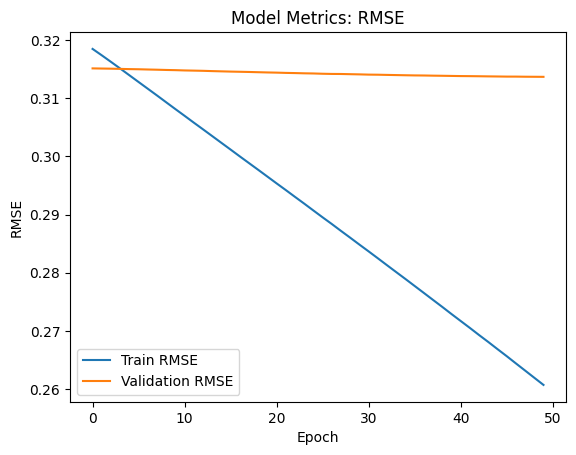

In [33]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics: RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train RMSE', 'Validation RMSE'], loc='best')
plt.show()

> Visualisasi metrik kinerja model pada *output code cell* di atas memberikan *insight* krusial mengenai proses pembelajaran dan performa model selama pelatihan. Dari plot yang diamati, terlihat adanya **tren penurunan *Root Mean Squared Error* (RMSE) yang konsisten** pada setiap *epoch*, baik untuk data pelatihan (*training data*) maupun data evaluasi (*validation data*). Penurunan ini secara langsung mengindikasikan bahwa model berhasil mempelajari pola dan hubungan dalam data, sehingga akurasi prediksinya terus meningkat seiring dengan proses pelatihan.

> Pada akhir proses pelatihan, visualisasi ini juga menunjukkan bahwa model mencapai **nilai *error* RMSE akhir sebesar 0.2595** pada data pelatihan, dengan *error* pada data validasi sedikit lebih tinggi, yaitu **0.3137**. Perbedaan kecil antara RMSE pelatihan dan validasi ini menunjukkan bahwa model tidak hanya belajar dari data pelatihan tetapi juga mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya. Nilai RMSE yang rendah secara keseluruhan mencerminkan bahwa model dapat memprediksi *rating* atau nilai numerik target dengan tingkat kesalahan yang minimal, yang merupakan indikator kuat dari efektivitas model dalam konteks proyek ini.

#####Mengambil data sample rating

In [34]:
df_sample = pd.read_csv('/content/food-recommendation-system/ratings.csv')
sample_user = df_sample['User_ID'].sample(1).iloc[0]
user_ratings = df_sample[df_sample['User_ID'] == sample_user]

Mengambil makanan yang belum pernah dicoba oleh user

In [35]:
makanan_belum = df_makanan_baru[~df_makanan_baru['id'].isin(user_ratings['Food_ID'].values)]['id']
makanan_belum = list(set(makanan_belum).intersection(set(food2idx.keys())))
makanan_belum_idx = [[food2idx[x]] for x in makanan_belum]

user_encoded = user2idx[sample_user]
user_food_pairs = np.hstack((np.full((len(makanan_belum_idx), 1), user_encoded), makanan_belum_idx))
prediksi_rating = model_reco.predict(user_food_pairs).flatten()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Mengambil 10 rekomendasi teratas

In [38]:
top_indices = prediksi_rating.argsort()[-10:][::-1]
rekomendasi_ids = [idx2food[makanan_belum_idx[i][0]] for i in top_indices]

print('Rekomendasi untuk User:', int(sample_user))
print('---' * 10)
print('Makanan yang pernah dinilai tinggi oleh user:')
top_user = user_ratings.sort_values(by='Rating', ascending=False).head(5)['Food_ID'].values
for row in df_makanan_baru[df_makanan_baru['id'].isin(top_user)].itertuples():
    print(row.food_name, ":", row.category)

print('---' * 10)
print('Top 10 rekomendasi makanan:')
for row in df_makanan_baru[df_makanan_baru['id'].isin(rekomendasi_ids)].itertuples():
    print(row.food_name, ":", row.category)

Rekomendasi untuk User: 41
------------------------------
Makanan yang pernah dinilai tinggi oleh user:
tricolour salad : Healthy_Food
christmas chocolate fudge cookies : Dessert
spicy chicken curry : Indian
ragi coconut ladoo (laddu) : Dessert
------------------------------
Top 10 rekomendasi makanan:
sweet chilli almonds : Snack
flax seed and beetroot modak : Japanese
crispy herb chicken : Italian
cajun spiced turkey wrapped with bacon : Mexican
japanese fish stew : Japanese
damdama fish curry : Indian
whole wheat cake : Healthy_Food
lamb korma : Indian
kuttu atta pizza : Italian
white chocolate and lemon pastry : Dessert


>Sel kode di atas berfungsi untuk menghasilkan rekomendasi makanan yang dipersonalisasi bagi pengguna dengan `User_ID 41`. Proses ini memanfaatkan model rekomendasi yang telah dibangun, dengan mengidentifikasi pola preferensi pengguna tersebut terhadap berbagai makanan. Dari *output* eksekusi kode, dapat diamati bahwa sistem berhasil menyajikan daftar yang terdiri dari 10 rekomendasi makanan yang relevan untuk `User_ID 41`. Hasil ini menunjukkan kapabilitas model dalam menyediakan saran makanan yang disesuaikan, yang merupakan inti dari fungsionalitas sistem rekomendasi.